In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
gdown.download(id= '1yTtu0wxaT6oMFE41FMeTs9_a2xDPfsI3')
gdown.download(id= '1xZ-J8GI1h11MuF90Brf5hl6JFc7v9URl')
gdown.download(id= '1W_x-qLVF7CzPUmtFzTzrgJtkdLzxlX70')

Downloading...
From: https://drive.google.com/uc?id=1yTtu0wxaT6oMFE41FMeTs9_a2xDPfsI3
To: /content/real_news_2days_data.xlsx
100%|██████████| 636k/636k [00:00<00:00, 88.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xZ-J8GI1h11MuF90Brf5hl6JFc7v9URl
To: /content/fake_news_data.xlsx
100%|██████████| 185k/185k [00:00<00:00, 61.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W_x-qLVF7CzPUmtFzTzrgJtkdLzxlX70
To: /content/train_data.csv
100%|██████████| 7.39M/7.39M [00:00<00:00, 157MB/s]


'train_data.csv'

In [4]:
rndf = pd.read_excel('/content/real_news_2days_data.xlsx')
fndf = pd.read_excel('/content/fake_news_data.xlsx')
rfndf = pd.read_csv('/content/train_data.csv')

## Removing the unwanted columns and merging, real and fake news.

In [5]:
rndf.drop(['@type','headline','Unnamed: 0.1',	'news',	'@context', 'mainEntityOfPage','url','keywords', 'dateModified','publisher','hasPart','author','associatedMedia','image',	'Unnamed: 0'], axis=1, inplace = True)
rndf.head()

,articleSection,description,datePublished,articleBody,real/fake
0,Cover Story,The rise in the number of cases and deaths due...,2023-05-05T17:34:03+05:30,IT was only natural that India took the lead i...,NaN
1,Editor's Note,The spectre of TB not only continues to haunt ...,2023-05-04T16:42:21+05:30,Through the Covid-19 pandemic that inaugurated...,NaN
2,UP Front,District Reserve Guard men have great terrain ...,2023-05-05T15:09:21+05:30,"After a gap of almost four years, a major Maoi...",NaN
3,UP Front,Mayawati’s Muslim outreach has set the alarm b...,2023-05-05T15:01:40+05:30,"On April 24, when Bihar chief minister Nitish ...",NaN
4,UP Front,The sangamam is officially to connect Saurasht...,2023-05-05T13:46:21+05:30,A millennium-old conn&shy;ec&shy;tion was revi...,NaN


In [6]:
fndf.head()

,Unnamed: 0,news,articlesection,Title,Date,Description
0,0,NaN,politics,Journalist asks The Kerala Story makers to sha...,2023-05-07T15:24:10+05:30,The massive box office success of The has made...
1,1,NaN,politics,"Imran Khan fools Pakistanis, does a concert pr...",2023-04-09T18:31:25+05:30,"Marshmello played a live set in Karachi, Pakis..."
2,2,NaN,politics,Jio Cinema buys digital streaming rights of UP...,2023-04-30T10:47:56+05:30,Gangster-turned-politician Atiq Ahmad whose so...
3,3,NaN,politics,Wrestlers’ protest row: Phogat sisters to retu...,2023-05-04T18:16:30+05:30,Indian wrestlers protesting against Wrestling ...
4,4,NaN,politics,SC to form Collegium to decide people’s gender,2023-04-30T10:48:01+05:30,During the hearing on the recognition of same-...


In [7]:
fndf.articlesection.value_counts()

Nan              360
politics           9
global             9
entertainment      9
business           9
Name: articlesection, dtype: int64

In [8]:
# 360 ÷ 845 = 0.42603550295858 = 42.603550295858%
# 42 percent of the data is nan in article section. so we will remove that too.

In [9]:
rndf.drop(['articleSection'], axis=1, inplace = True)
fndf.drop(['articlesection','Unnamed: 0','news'], axis=1, inplace = True)

In [10]:
print(rndf.columns,'\n',fndf.columns)

Index(['description', 'datePublished', 'articleBody', 'real/fake'], dtype='object') 
 Index(['Title', 'Date', 'Description'], dtype='object')


In [11]:
rndf.rename(columns = {'description':'Title', 'datePublished':'Date','articleBody':'Body','real/fake':'Real/Fake'}, inplace = True)
fndf.rename(columns = {'Description':'Body'}, inplace = True)

In [12]:
# setting all the real news to 0 and fake news to 1.
rndf['Real/Fake']=0
rndf.head()

,Title,Date,Body,Real/Fake
0,The rise in the number of cases and deaths due...,2023-05-05T17:34:03+05:30,IT was only natural that India took the lead i...,0
1,The spectre of TB not only continues to haunt ...,2023-05-04T16:42:21+05:30,Through the Covid-19 pandemic that inaugurated...,0
2,District Reserve Guard men have great terrain ...,2023-05-05T15:09:21+05:30,"After a gap of almost four years, a major Maoi...",0
3,Mayawati’s Muslim outreach has set the alarm b...,2023-05-05T15:01:40+05:30,"On April 24, when Bihar chief minister Nitish ...",0
4,The sangamam is officially to connect Saurasht...,2023-05-05T13:46:21+05:30,A millennium-old conn&shy;ec&shy;tion was revi...,0


In [13]:
fndf['Real/Fake']=1
fndf.head()

,Title,Date,Body,Real/Fake
0,Journalist asks The Kerala Story makers to sha...,2023-05-07T15:24:10+05:30,The massive box office success of The has made...,1
1,"Imran Khan fools Pakistanis, does a concert pr...",2023-04-09T18:31:25+05:30,"Marshmello played a live set in Karachi, Pakis...",1
2,Jio Cinema buys digital streaming rights of UP...,2023-04-30T10:47:56+05:30,Gangster-turned-politician Atiq Ahmad whose so...,1
3,Wrestlers’ protest row: Phogat sisters to retu...,2023-05-04T18:16:30+05:30,Indian wrestlers protesting against Wrestling ...,1
4,SC to form Collegium to decide people’s gender,2023-04-30T10:48:01+05:30,During the hearing on the recognition of same-...,1


In [14]:
df = pd.concat([rndf,fndf],ignore_index =True)
df.head()

,Title,Date,Body,Real/Fake
0,The rise in the number of cases and deaths due...,2023-05-05T17:34:03+05:30,IT was only natural that India took the lead i...,0
1,The spectre of TB not only continues to haunt ...,2023-05-04T16:42:21+05:30,Through the Covid-19 pandemic that inaugurated...,0
2,District Reserve Guard men have great terrain ...,2023-05-05T15:09:21+05:30,"After a gap of almost four years, a major Maoi...",0
3,Mayawati’s Muslim outreach has set the alarm b...,2023-05-05T15:01:40+05:30,"On April 24, when Bihar chief minister Nitish ...",0
4,The sangamam is officially to connect Saurasht...,2023-05-05T13:46:21+05:30,A millennium-old conn&shy;ec&shy;tion was revi...,0


In [15]:
df['year'] = 1
df['month'] = 1
df['day'] = 1

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
for i in range(len(df['Date'])):
  df['year'][i] = df['Date'][i].year 
  df['month'][i] = df['Date'][i].month
  df['day'][i] = df['Date'][i].day 
df.head()

,Title,Date,Body,Real/Fake,year,month,day
0,The rise in the number of cases and deaths due...,2023-05-05 17:34:03+05:30,IT was only natural that India took the lead i...,0,2023,5,5
1,The spectre of TB not only continues to haunt ...,2023-05-04 16:42:21+05:30,Through the Covid-19 pandemic that inaugurated...,0,2023,5,4
2,District Reserve Guard men have great terrain ...,2023-05-05 15:09:21+05:30,"After a gap of almost four years, a major Maoi...",0,2023,5,5
3,Mayawati’s Muslim outreach has set the alarm b...,2023-05-05 15:01:40+05:30,"On April 24, when Bihar chief minister Nitish ...",0,2023,5,5
4,The sangamam is officially to connect Saurasht...,2023-05-05 13:46:21+05:30,A millennium-old conn&shy;ec&shy;tion was revi...,0,2023,5,5


In [17]:
print('year :\n', df.year.value_counts(),'\n','**************')
print('month :\n',df.month.value_counts(),'\n','**************')
print('day :\n',df.day.value_counts(),'\n','**************')

year :
 2023    597
2022    248
Name: year, dtype: int64 
 **************
month :
 5     462
4     169
3      64
9      36
2      28
10     28
1      24
11     11
7      11
8       8
12      3
6       1
Name: month, dtype: int64 
 **************
day :
 5     182
4     146
7      84
6      56
3      50
30     24
1      22
2      18
29     17
16     15
22     15
13     15
15     14
25     13
28     12
9      12
19     12
14     12
12     11
8      11
21     11
18     11
23     10
11     10
26     10
27     10
20      9
10      9
31      9
24      8
17      7
Name: day, dtype: int64 
 **************


In [18]:
df.isnull().sum()

Title         0
Date          0
Body         13
Real/Fake     0
year          0
month         0
day           0
dtype: int64

In [19]:
# dates dose not have even spread of data and dose not make a lot of information so we are removing them.

In [20]:
df.drop(['Date','year','month','day'], axis=1, inplace = True)

In [21]:
df

,Title,Body,Real/Fake
0,The rise in the number of cases and deaths due...,IT was only natural that India took the lead i...,0
1,The spectre of TB not only continues to haunt ...,Through the Covid-19 pandemic that inaugurated...,0
2,District Reserve Guard men have great terrain ...,"After a gap of almost four years, a major Maoi...",0
3,Mayawati’s Muslim outreach has set the alarm b...,"On April 24, when Bihar chief minister Nitish ...",0
4,The sangamam is officially to connect Saurasht...,A millennium-old conn&shy;ec&shy;tion was revi...,0
...,...,...,...
840,The Kashmir Files Declared Tax Free In Pakistan,The Kashmir Files has taken India by storm. Th...,1
841,The Kashmir Files: Yet Another Vivek Agnihotri...,Vivek Agnihotri’s The Kashmir Files has opened...,1
842,Starbucks Fires an Employee for Successfully S...,A misspelled name on the side of your Starbuck...,1
843,In retaliation to India’s Accidentally Fired M...,Pakistan said on Friday that it has retaliated...,1


In [22]:
rfndf = rfndf.iloc[:,:3]# droping all the unused colomns
rfndf

,Head,Body,Label
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1.0
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1.0
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1.0
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1.0
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1.0
...,...,...,...
3403,"We just asked him to introduce himself, will a...",Encouraged by the response to Ramayan and Maha...,1.0
3404,Mumbai Police taping Arnab's mouth shut while ...,There is some good news for Whatsapp admins wh...,1.0
3405,"Mumbai police calls Arnab for interrogation, A...",In an effort to prevent the spread of coronavi...,1.0
3406,"Coronavirus enters Arnab’s debate show, team o...",As number of coronavirus related cases see a r...,1.0


In [23]:
rfndf.rename(columns = {'Head':'Title', 'Label':'Real/Fake'}, inplace = True)

In [24]:
rfndf.dropna(inplace = True)
rfndf['Real/Fake'] = rfndf['Real/Fake'].astype(int)
rfndf

,Title,Body,Real/Fake
0,‘Sitting upon a volcano’: Doctors in Bengal ri...,The population of West Bengal is three times t...,1
1,"Covid-19: As millions fear starvation, activis...",The Right to Food Campaign on Tuesday issued a...,1
2,Delhi violence: UAPA against Jamia students an...,Human rights organisation Amnesty Internationa...,1
3,By crowdfunding benefits for embattled workers...,"For urban Indians, the Covid-19 lockdown has m...",1
4,The Art of Solitude: Franklin Boukaka and Manu...,Jazz has always brought me joy. This fortnight...,1
...,...,...,...
3403,"We just asked him to introduce himself, will a...",Encouraged by the response to Ramayan and Maha...,1
3404,Mumbai Police taping Arnab's mouth shut while ...,There is some good news for Whatsapp admins wh...,1
3405,"Mumbai police calls Arnab for interrogation, A...",In an effort to prevent the spread of coronavi...,1
3406,"Coronavirus enters Arnab’s debate show, team o...",As number of coronavirus related cases see a r...,1


In [25]:
df = pd.concat([df,rfndf],ignore_index =True)
df

,Title,Body,Real/Fake
0,The rise in the number of cases and deaths due...,IT was only natural that India took the lead i...,0
1,The spectre of TB not only continues to haunt ...,Through the Covid-19 pandemic that inaugurated...,0
2,District Reserve Guard men have great terrain ...,"After a gap of almost four years, a major Maoi...",0
3,Mayawati’s Muslim outreach has set the alarm b...,"On April 24, when Bihar chief minister Nitish ...",0
4,The sangamam is officially to connect Saurasht...,A millennium-old conn&shy;ec&shy;tion was revi...,0
...,...,...,...
4129,"We just asked him to introduce himself, will a...",Encouraged by the response to Ramayan and Maha...,1
4130,Mumbai Police taping Arnab's mouth shut while ...,There is some good news for Whatsapp admins wh...,1
4131,"Mumbai police calls Arnab for interrogation, A...",In an effort to prevent the spread of coronavi...,1
4132,"Coronavirus enters Arnab’s debate show, team o...",As number of coronavirus related cases see a r...,1


In [26]:
df[df['Real/Fake']==1]

,Title,Body,Real/Fake
449,Journalist asks The Kerala Story makers to sha...,The massive box office success of The has made...,1
450,"Imran Khan fools Pakistanis, does a concert pr...","Marshmello played a live set in Karachi, Pakis...",1
451,Jio Cinema buys digital streaming rights of UP...,Gangster-turned-politician Atiq Ahmad whose so...,1
452,Wrestlers’ protest row: Phogat sisters to retu...,Indian wrestlers protesting against Wrestling ...,1
453,SC to form Collegium to decide people’s gender,During the hearing on the recognition of same-...,1
...,...,...,...
4129,"We just asked him to introduce himself, will a...",Encouraged by the response to Ramayan and Maha...,1
4130,Mumbai Police taping Arnab's mouth shut while ...,There is some good news for Whatsapp admins wh...,1
4131,"Mumbai police calls Arnab for interrogation, A...",In an effort to prevent the spread of coronavi...,1
4132,"Coronavirus enters Arnab’s debate show, team o...",As number of coronavirus related cases see a r...,1


## Data Cleaning Pipe line

In [27]:
df.isnull().value_counts()

Title  Body   Real/Fake
False  False  False        4121
       True   False          13
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df['Body'].isnull().value_counts()

False    4121
Name: Body, dtype: int64

In [30]:
df['Title'] = [i.lower() for i in df['Title']]
df['Title'] = df['Title'].str.replace("[^a-zA-Z0-9]", " ") 
df['Body'] = [str(i).lower() for i in df['Body']]
df['Body'] = df['Body'].str.replace("[^a-zA-Z0-9]", " ") 

In [31]:
df.head()

,Title,Body,Real/Fake
0,the rise in the number of cases and deaths due...,it was only natural that india took the lead i...,0
1,the spectre of tb not only continues to haunt ...,through the covid 19 pandemic that inaugurated...,0
2,district reserve guard men have great terrain ...,after a gap of almost four years a major maoi...,0
3,mayawati s muslim outreach has set the alarm b...,on april 24 when bihar chief minister nitish ...,0
4,the sangamam is officially to connect saurasht...,a millennium old conn shy ec shy tion was revi...,0


### Lemmatizer

In [32]:
lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

    lemmatized_sentence = []
    
    for word, tag in nltk_tagged:
        if tag is None:

            lemmatized_sentence.append(word)
        else:
          try:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
          except:
            lemmatized_sentence.append(word)

    return " ".join(lemmatized_sentence)

In [33]:
df['Title'] = df['Title'].apply(lambda x: lemmatize_sentence(x))
df['Body'] = df['Body'].apply(lambda x: lemmatize_sentence(x))

### Stopwords Removal

In [34]:
def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

In [35]:
df['Title'] = [remove_stopwords(r) for r in df['Title']]
df['Body'] = [remove_stopwords(r) for r in df['Body']]

### word_cloud

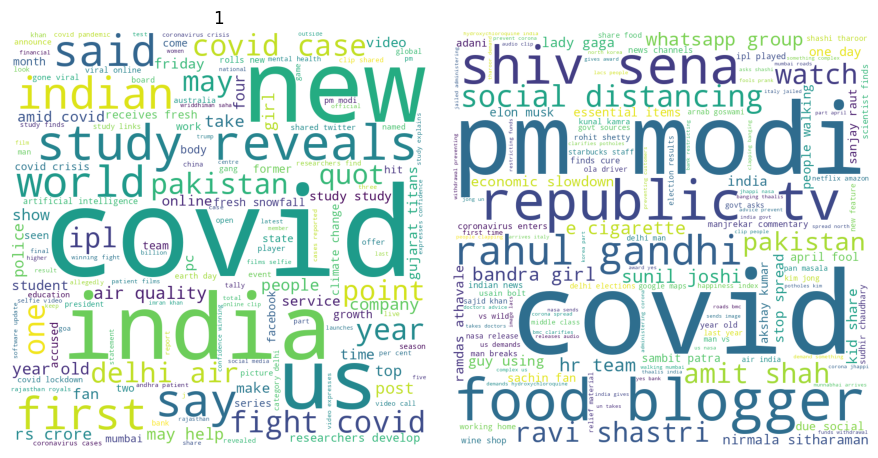

In [36]:
d = list(df['Real/Fake'].unique())
plt.figure(figsize = (9, 9), facecolor = None) 
for i in range(len(d)):
  word_cloud_df = df.loc[df['Real/Fake'] == d[i],:]
  all_words = ' '.join([text for text in word_cloud_df['Title']])
  

  wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='white', 
                        min_font_size = 10).generate(all_words)

                        
  plt.title(d[i])
  plt.subplot(2,2,i+1)
  plt.imshow(wordcloud) 
  plt.axis("off") 
plt.tight_layout() 
plt.show()

## ML

### Vectorizing Title.

In [37]:
vectorizer = TfidfVectorizer(max_features = 400)

t = vectorizer.fit_transform(df['Title'])

feature_names = vectorizer.get_feature_names_out()

vecdf = pd.DataFrame(t.toarray(), columns = feature_names)
df = df.merge(vecdf,how = 'outer',left_index=True,right_index=True)
df

,Title,Body,Real/Fake,000,039,10,15,19,20,2020,...,wins,withdrawal,without,women,work,workers,world,year,years,youtube
0,rise number cases deaths due drug resistant tu...,natural india took lead hosting one world tb s...,0.0,0.0,0.30182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,spectre tb continues haunt india sharpening kn...,covid 19 pandemic inaugurated decade one refra...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,district reserve guard men great terrain knowl...,gap almost four years major maoist attack took...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mayawati muslim outreach set alarm bells ringi...,april 24 bihar chief minister nitish kumar cam...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sangamam officially connect saurashtra tamils ...,millennium old conn shy ec shy tion revived re...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,asked introduce ask next question second round...,encouraged response ramayan mahabharat doordar...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4130,mumbai police taping arnab mouth shut interrog...,good news whatsapp admins actively sharing cor...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4131,mumbai police calls arnab interrogation arnab ...,effort prevent spread coronavirus republic tv ...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4132,coronavirus enters arnab debate show team doct...,number coronavirus related cases see rise indi...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Vectorizing Body

In [38]:
df['Body'].isnull().value_counts()

False    4121
True       13
Name: Body, dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
df['Body'].isnull().value_counts()

False    4108
Name: Body, dtype: int64

In [41]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features = 40000)

t = vectorizer.fit_transform(df['Body'])

feature_names = vectorizer.get_feature_names_out()

vecdf = pd.DataFrame(t.toarray(), columns = feature_names)
df = df.merge(vecdf,how = 'outer',left_index=True,right_index=True)
df

,Title,Body,Real/Fake,000_x,039_x,10_x,15_x,19_x,20_x,2020_x,...,zuckerman,zuckerman mind,zurbuchen,zurbuchen associate,zurich,zurich switzerland,zydus,zydus cadila,zygomatic,zygomatic smile
0,rise number cases deaths due drug resistant tu...,natural india took lead hosting one world tb s...,0.0,0.0,0.30182,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,spectre tb continues haunt india sharpening kn...,covid 19 pandemic inaugurated decade one refra...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,district reserve guard men great terrain knowl...,gap almost four years major maoist attack took...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mayawati muslim outreach set alarm bells ringi...,april 24 bihar chief minister nitish kumar cam...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,sangamam officially connect saurashtra tamils ...,millennium old conn shy ec shy tion revived re...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,supreme court asks mumbai metro stop projects ...,caught moral dilemma extra marital affair midd...,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4117,keep entertained lockdown amit shah found bing...,buffalo racer srinivasa gouda whose video went...,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4118,encourages use new mask worn mouth stop spread...,congress scored huge zero recently concluded d...,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4119,like rioters ramdas athavale proposes publicly...,parasite victory oscar given delhi man unlimit...,1.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
del df['Title']
del df['Body']

In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

Real/Fake             0
000_x                 0
039_x                 0
10_x                  0
15_x                  0
                     ..
zurich switzerland    0
zydus                 0
zydus cadila          0
zygomatic             0
zygomatic smile       0
Length: 40401, dtype: int64

### Train_Test_split.

In [45]:
x = df.drop(columns=['Real/Fake'])
y = df['Real/Fake']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)
x_train.shape

(3071, 40400)

### ML

#### PipeLine

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [47]:
param_grid = [
    {
        'model': [LogisticRegression(),{'C': np.arange(20, 30, 1)}],
    },
    {
        'model': [MultinomialNB(),{'alpha': np.arange(0.41, 0.71, 0.01)}],
        
    },
    {
        'model': [RandomForestClassifier(),
         {'n_estimators': np.arange(100, 200, 20),
        'max_depth': np.arange(3, 13, 1)}
        ],
        
    }
]

best_model = None
best_params = None
best_accuracy = 0.0

for params in param_grid:
    model = params['model'][0]
    
    model_name = model.__class__.__name__

    grid_search = GridSearchCV(model, params['model'][1], cv=5, scoring='f1')
    grid_search.fit(x_train, y_train)

    if grid_search.best_score_ > best_accuracy:
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_accuracy = grid_search.best_score_

    print("Model:", model_name)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)
    print()

best_model.fit(x_train, y_train)

accuracy = best_model.score(x_test, y_test)

print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Model: LogisticRegression
Best Parameters: {'C': 23}
Best Accuracy: 0.9372452505928708

Model: MultinomialNB
Best Parameters: {'alpha': 0.6400000000000001}
Best Accuracy: 0.9333253826202718

Model: RandomForestClassifier
Best Parameters: {'max_depth': 12, 'n_estimators': 140}
Best Accuracy: 0.9412043277532991

Best Model: RandomForestClassifier(max_depth=12, n_estimators=140)
Best Parameters: {'max_depth': 12, 'n_estimators': 140}
Accuracy: 0.94140625


In [48]:
from google.colab import files
import pickle

# Assuming you have the best model stored in the variable 'best_model'
# Save the model to a file using pickle
with open('/content/best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Download the model file
files.download('/content/best_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>